In [1]:
#  Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

# 1. Load & Inspect Data

In [2]:
df = pd.read_excel('E:\Courses\Data Analysis\Projects\Stock Company Project\Tesla.xlsx')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,5.368,5.400,5.180,5.324,5.324,6415000
1,2011-01-04,5.332,5.390,5.204,5.334,5.334,5937000
2,2011-01-05,5.296,5.380,5.238,5.366,5.366,7233500
3,2011-01-06,5.366,5.600,5.362,5.576,5.576,10306000
4,2011-01-07,5.600,5.716,5.580,5.648,5.648,11239500


# 2. Clean & Prepare

In [4]:
# Standardize column names (strip spaces, title-case common OHLCV names)
df.columns = [c.strip().replace(' ', '_') for c in df.columns]

# Ensure expected columns exist
expected = ['Date','Open','High','Low','Close','Volume']
# Try to map case-insensitively
lower_map = {c.lower(): c for c in df.columns}
for col in expected:
    if col not in df.columns:
        # find a close match by lowercase
        key = col.lower()
        if key in lower_map:
            df.rename(columns={lower_map[key]: col}, inplace=True)

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date just in case
df = df.sort_values('Date').reset_index(drop=True)

# Drop duplicates
before = len(df)
df = df.drop_duplicates(subset=['Date'])
after = len(df)
print(f"Deduplicated by Date: removed {before - after} rows")

# Ensure numeric types
for col in ['Open','High','Low','Close','Volume']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle any remaining missing numeric data by forward-fill then back-fill
df[['Open','High','Low','Close','Volume']] = df[['Open','High','Low','Close','Volume']].ffill().bfill()

df.info()

Deduplicated by Date: removed 0 rows
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2767 entries, 0 to 2766
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2767 non-null   datetime64[ns]
 1   Open       2767 non-null   float64       
 2   High       2767 non-null   float64       
 3   Low        2767 non-null   float64       
 4   Close      2767 non-null   float64       
 5   Adj_Close  2767 non-null   float64       
 6   Volume     2767 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 151.4 KB


# 3. Descriptive Statistics

In [5]:
summary = df[['Open','High','Low','Close','Volume']].describe()
summary

,Open,High,Low,Close,Volume
count,2767.000000,2767.000000,2767.000000,2767.000000,2.767000e+03
mean,128.151516,130.874160,125.266140,128.257223,3.250647e+07
std,228.721221,233.717324,223.353242,228.956748,2.827950e+07
min,4.356000,4.454000,4.222000,4.366000,1.198000e+06
25%,29.693999,30.083000,28.814999,29.518001,1.456025e+07
50%,47.299999,48.271999,46.486000,47.444000,2.580950e+07
75%,67.778999,68.924999,66.584999,67.613998,4.087675e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,3.046940e+08


# 4.1 Closing Price Over Time

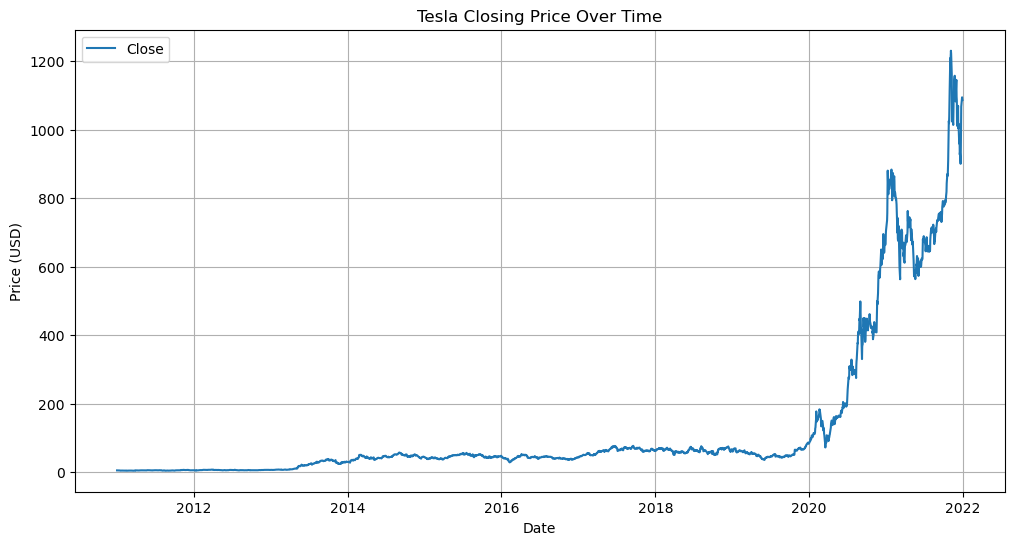

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close')
plt.title("Tesla Closing Price Over Time")
plt.xlabel("Date"); plt.ylabel("Price (USD)")
plt.legend(); plt.grid(True)
plt.show()

# 4.2 Trading Volume Over Time

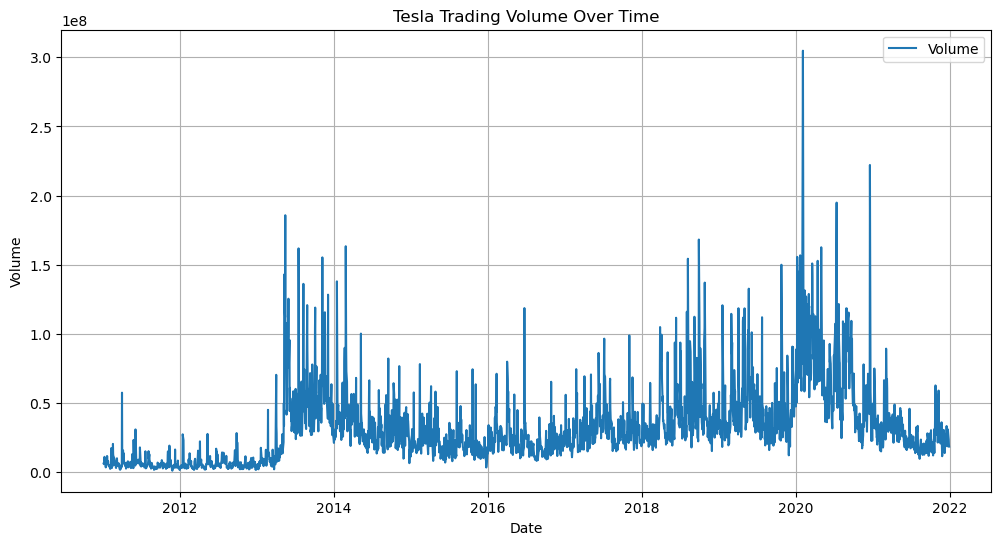

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Volume'], label='Volume')
plt.title("Tesla Trading Volume Over Time")
plt.xlabel("Date"); plt.ylabel("Volume")
plt.legend(); plt.grid(True)
plt.show()

# 4.3 Moving Averages (30 & 90 Days)

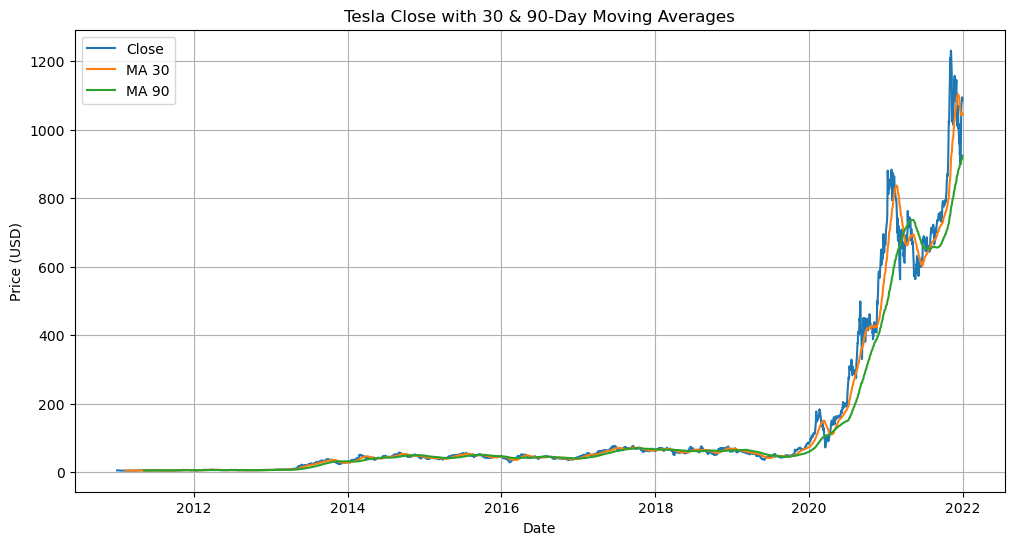

In [8]:
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['MA_90'] = df['Close'].rolling(window=90).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['MA_30'], label='MA 30')
plt.plot(df['Date'], df['MA_90'], label='MA 90')
plt.title("Tesla Close with 30 & 90-Day Moving Averages")
plt.xlabel("Date"); plt.ylabel("Price (USD)")
plt.legend(); plt.grid(True)
plt.show()

# 4.4 Daily High-Low Range

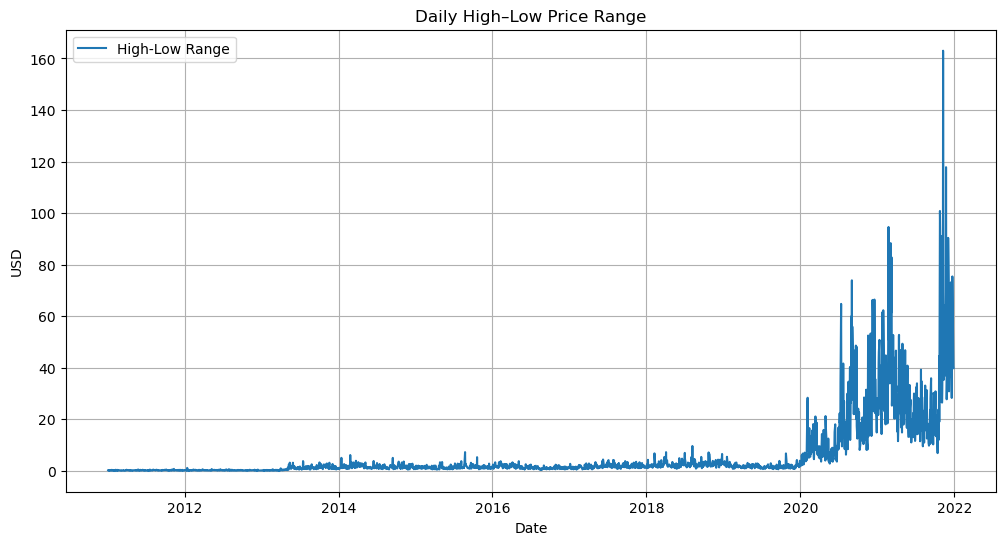

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['High'] - df['Low'], label='High-Low Range')
plt.title("Daily High–Low Price Range")
plt.xlabel("Date"); plt.ylabel("USD")
plt.legend(); plt.grid(True)
plt.show()

# 4.5 Correlation (Open, High, Low, Close, Volume)

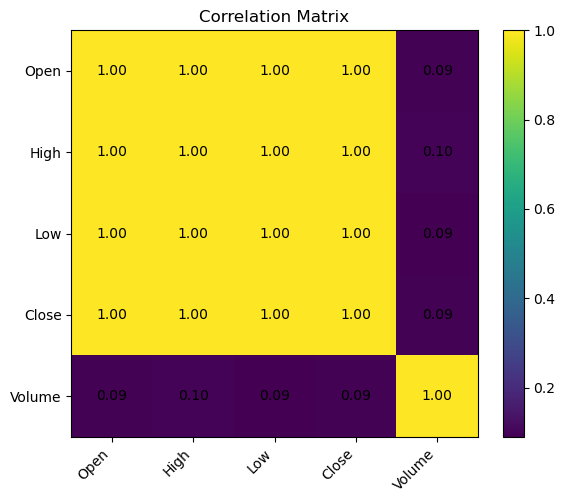

In [10]:
numeric_cols = ['Open','High','Low','Close','Volume']
corr = df[numeric_cols].corr()

plt.figure(figsize=(6,5))
plt.imshow(corr, interpolation='nearest')
plt.title("Correlation Matrix")
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha='right')
plt.yticks(range(len(numeric_cols)), numeric_cols)
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha="center", va="center")
plt.colorbar()
plt.tight_layout()
plt.show()

# 5. Growth & Volatility

Start Date: 2011-01-03, Close: $5.32
End Date:   2021-12-29, Close: $1086.19
Total Growth over period: 20301.76%



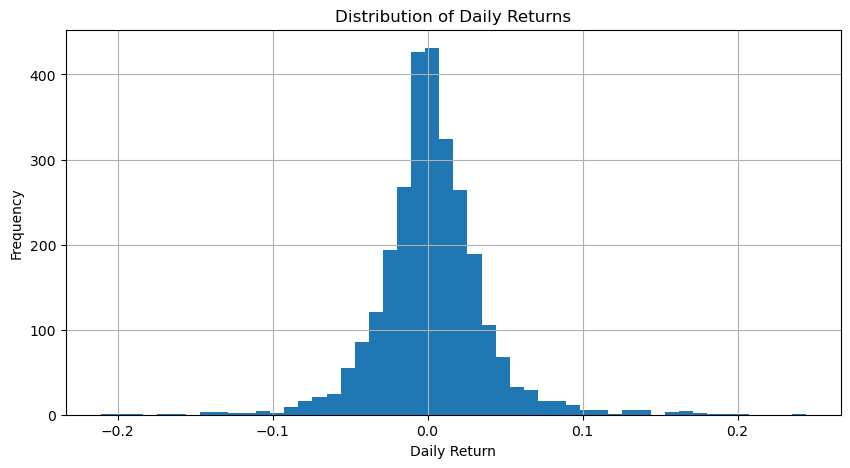

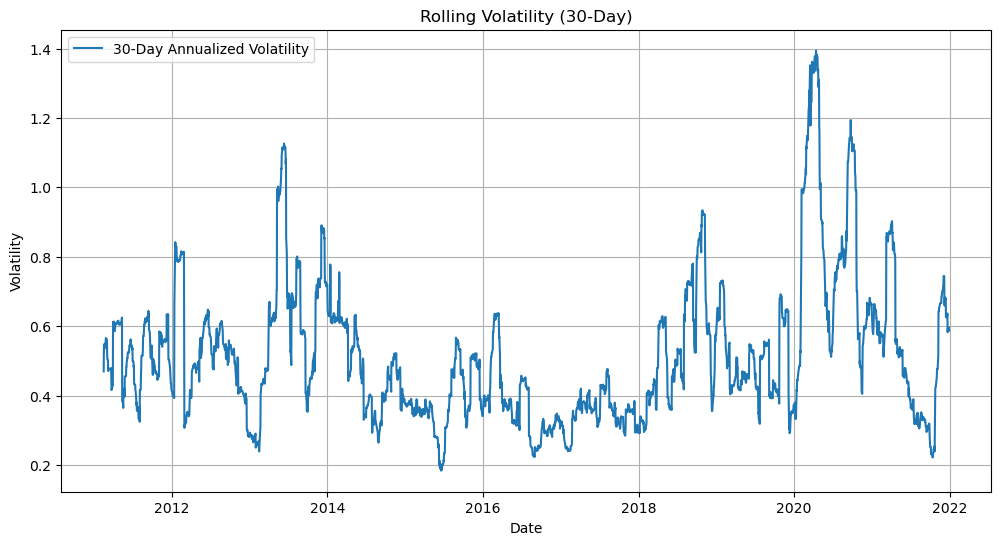

In [11]:
# Daily returns
df['Return'] = df['Close'].pct_change()

# Cumulative growth over the dataset period
start_price = df['Close'].iloc[0]
end_price = df['Close'].iloc[-1]
growth_pct = (end_price / start_price - 1) * 100

print(f"Start Date: {df['Date'].iloc[0].date()}, Close: ${start_price:.2f}")
print(f"End Date:   {df['Date'].iloc[-1].date()}, Close: ${end_price:.2f}")
print(f"Total Growth over period: {growth_pct:.2f}%\n")

# Plot returns distribution (histogram)
plt.figure(figsize=(10,5))
plt.hist(df['Return'].dropna(), bins=50)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return"); plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Rolling volatility (30d std of returns)
df['Volatility_30d'] = df['Return'].rolling(window=30).std() * np.sqrt(252)  # annualized approx

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Volatility_30d'], label='30-Day Annualized Volatility')
plt.title("Rolling Volatility (30-Day)")
plt.xlabel("Date"); plt.ylabel("Volatility")
plt.legend(); plt.grid(True)
plt.show()